# TES Bolometers:  tau and loop gain vs Psat

TES bolometers have a limited set of parameters we can tune to set the required Psat, which we model as 

$$ P_{sat} = k (T_{bolo}^n - T_{bath}^n) $$

where $n$ is the leg materials' effective thermal conductivity index, and k is typically engineered by changing the cross section and length of the legs.  In this model the thermal conductivity of the leg material is proportional to $T^\beta$, with $n = \beta +1$, and $\beta = 1$ for normal metals, $\beta = 3$ for a crystal lattice.  Therefore we expect n to lie between 2 and 4, depending on the leg materials.

We specify $P_{sat}$ by first estimating the optical loading, and then multiplying that by a "safety factor", so the detector won't saturate under its optical load, and so there is room for some electrical power as well.  This safety factor is typically 2-3.

For CMB-S4, the detectors will have $P_{sat}$ ranging from about 1pW (at low frequencies) to about 30pW (at high frequencies). 

In this notebook we explore how the electrothermal loop gain and time constant (tau) depend on $P_{sat}$.

First let's set things up, including setting some default parameters of the system, which may be varied as we do our explorations.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [14, 8]

Tbolo = 0.16   # bolometer TES transition temperature
Tbath = 0.1    # cold bath temperature
f_safety = 3.  # =Psat/Poptical
n = 2.7        # default value of n
alpha = 200.   # R(T) slope in the transition, alpha = (T/R)dR/dT
C = 10.        # Heat capacity of the island;  this is arbitrary but constant for this notebook.
Psat = np.arange(1,30,0.01)
Pelec = Psat/f_safety

# $\tau$ and L 
The time constant is given by
$$ \tau = \frac{\tau_0}{(L+1)} $$ <br>
where 
$$\tau_0 = C/G_{dyn}, $$ <br>
$C$ is the heat capacity of the island at the superconducting transition temperature, and $G_{dyn}=dP/dT_{bolo}$ is the dynamic thermal conductance.   <br>
<br>
The electrothermal loop gain is given by
$$ L = \frac{\alpha P_{elec}}{G_{dyn} T_{bolo}}, $$ <br>
so in the high loop gain limit where $L \sim (L+1)$ we have<br>
$$ \tau = \frac{C}{G_{dyn} (L+1)} \sim \frac{C T_{bolo}}{\alpha P_{elec}}$$ <br>

Since by design $P_{sat} \propto P_{elec}$, we see that for fixed $C$, $T_{bolo}$ and $\alpha$,

$$ \tau \propto \frac{1}{P_{sat}},$$

in the high loop-gain limit.  Note that we have not yet assumed a particular law for $P_{sat}(T_{bolo}, T_{bath})$.

Let's now look at the loop gain to see how it depends on $P_{sat}$, given the particular (well-motivated) version of that law stated in the first section of this notebook,

$$ P_{sat} = k (T_{bolo}^n - T_{bath}^n) .$$

We take the derivative with resepct to $T_{bolo}$ to find 

$$ G_{dyn} = \frac{dP_{sat}}{dT_{bolo}} = n k T_{bolo}^{n-1} . $$

Note that if we're controlling $P_{sat}$ by varying $k$ only (ie for fixed $n$ and $T_{bolo}$), we see that $G_{dyn} \propto k$. 

Using this expression for $G_{dyn}$, and $P_{elec} = P_{sat}/f_{safety}$ in the equation for $L$ above, we find

$$ L = \frac{\alpha (T_{bolo}^n - T_{bath}^n)}{n f_{safety} T_{bolo}^{n}}, $$

where, noteably, the factors of $k$ have cancelled, 
<br>
**making $L$ independent of $P_{sat}$, if one is only varying $k$ to design bolometers with different $P_{sat}$.**

Going back to our expression for $\tau$,
$$ \tau = \frac{C}{G_{dyn} (L+1)}$$
we see that for constant $L$ and $C$, we have 

$$\tau \propto \frac{1}{G_{dyn}} \propto \frac{1}{k} \propto \frac{1}{P_{sat}} .$$

**That is,**

$$\tau \propto \frac{1}{P_{sat}} .$$

Well, it turns out we were able to derive our answers analytically.  But, let's have some fun with python and illustrate this.  Let's plot $\tau$ as a function of $P_{sat}$ in this model, for a range of values of $n$ and $T_{bolo}$. 

Tbolo = 0.160, Tbath = 0.100, n = 2.0, Loop gain = 20.3
Tbolo = 0.160, Tbath = 0.100, n = 3.0, Loop gain = 16.8
Tbolo = 0.160, Tbath = 0.100, n = 4.0, Loop gain = 14.1
Tbolo = 0.140, Tbath = 0.100, n = 2.7, Loop gain = 14.7
Tbolo = 0.160, Tbath = 0.100, n = 2.7, Loop gain = 17.8
Tbolo = 0.180, Tbath = 0.100, n = 2.7, Loop gain = 19.6


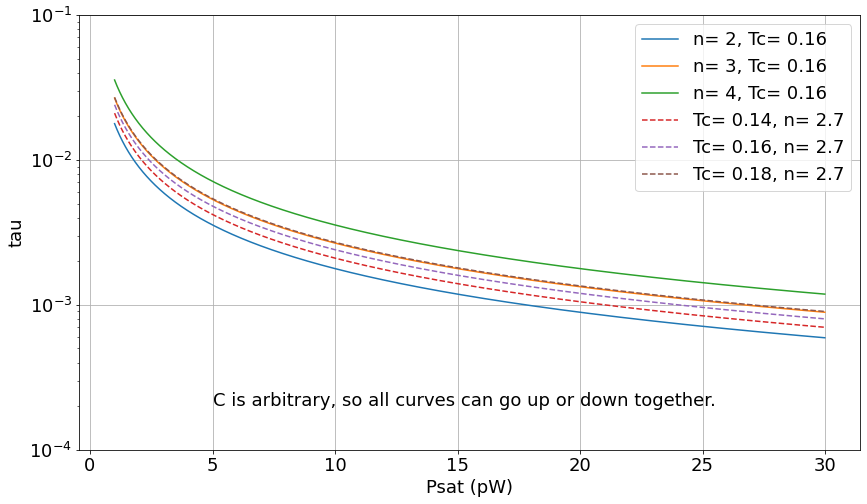

In [17]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [14, 8]

for nn in [2,3, 4]:
    L  = alpha*(Tbolo**nn - Tbath**nn)/(nn*f_safety*Tbolo**nn)
    n_str = 'n= '+str(nn)+', Tc= '+str(Tbolo) 
    k = Psat/(Tbolo**nn - Tbath**nn)
    Gdyn =n*k*Tbolo**(nn-1)
    tau0 = C/Gdyn
    tau = tau0/L
    plt.semilogy(Psat,tau,label=n_str)
    print('Tbolo = {0:2.3f}, Tbath = {1:2.3f}, n = {2:2.1f}, Loop gain = {3:2.1f}'.format(Tbolo,Tbath,nn,L))    

    
n = 2.7
for Tbolox in [0.14, 0.16, 0.18]:
    L  = alpha*(Tbolox**n - Tbath**n)/(n*f_safety*Tbolox**n)
    Tbolo_str = 'Tc= '+str(Tbolox)+', n= '+str(n)
    k = Psat/(Tbolox**n - Tbath**n)
    Gdyn =n*k*Tbolox**(n-1)
    tau0 = C/Gdyn
    tau = tau0/L
    plt.semilogy(Psat,tau,'--',label=Tbolo_str)
    print('Tbolo = {0:2.3f}, Tbath = {1:2.3f}, n = {2:2.1f}, Loop gain = {3:2.1f}'.format(Tbolox,Tbath,n,L))    


plt.ylabel('tau')
plt.xlabel('Psat (pW)')
plt.ylim([0.0001,0.1])
plt.legend()
plt.text(5,0.0002,'C is arbitrary, so all curves can go up or down together.')
plt.grid()

Notice that the timeconstant appears close to inversely proportional to $P_{sat}$ (as expected), if $C$ is held fixed.  To make that more explicit, let's plot the combination $P_{sat} \tau$.

Tbolo = 0.160, Tbath = 0.100, n = 2.0, Loop gain = 20.3
Tbolo = 0.160, Tbath = 0.100, n = 3.0, Loop gain = 16.8
Tbolo = 0.160, Tbath = 0.100, n = 4.0, Loop gain = 14.1
Tbolo = 0.140, Tbath = 0.100, n = 2.7, Loop gain = 14.7
Tbolo = 0.160, Tbath = 0.100, n = 2.7, Loop gain = 17.8
Tbolo = 0.180, Tbath = 0.100, n = 2.7, Loop gain = 19.6


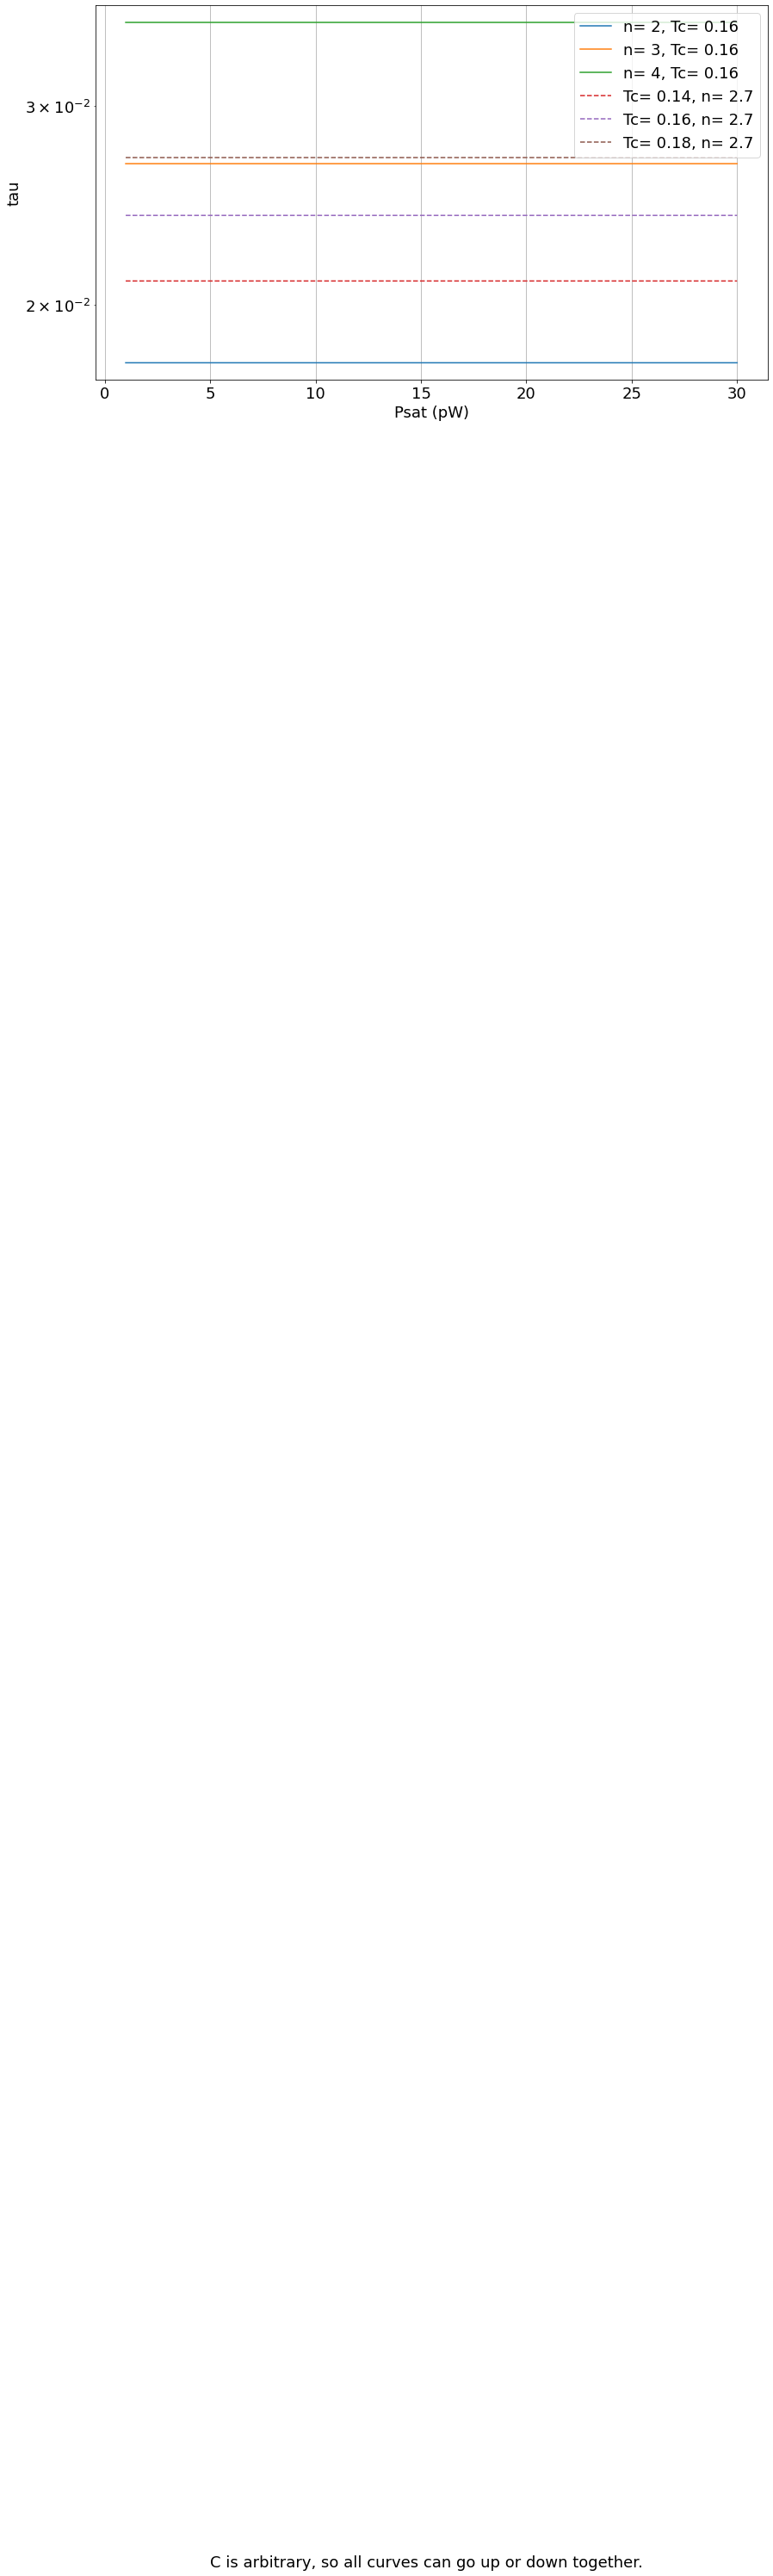

In [18]:
%matplotlib inline
plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [14, 8]

for nn in [2,3, 4]:
    L  = alpha*(Tbolo**nn - Tbath**nn)/(nn*f_safety*Tbolo**nn)
    n_str = 'n= '+str(nn)+', Tc= '+str(Tbolo) 
    k = Psat/(Tbolo**nn - Tbath**nn)
    Gdyn =n*k*Tbolo**(nn-1)
    tau0 = C/Gdyn
    tau = tau0/L
    plt.semilogy(Psat,tau*Psat,label=n_str)
    print('Tbolo = {0:2.3f}, Tbath = {1:2.3f}, n = {2:2.1f}, Loop gain = {3:2.1f}'.format(Tbolo,Tbath,nn,L))    

    
n = 2.7
for Tbolox in [0.14, 0.16, 0.18]:
    L  = alpha*(Tbolox**n - Tbath**n)/(n*f_safety*Tbolox**n)
    Tbolo_str = 'Tc= '+str(Tbolox)+', n= '+str(n)
    k = Psat/(Tbolox**n - Tbath**n)
    Gdyn =n*k*Tbolox**(n-1)
    tau0 = C/Gdyn
    tau = tau0/L
    plt.semilogy(Psat,tau*Psat,'--',label=Tbolo_str)
    print('Tbolo = {0:2.3f}, Tbath = {1:2.3f}, n = {2:2.1f}, Loop gain = {3:2.1f}'.format(Tbolox,Tbath,n,L))    


plt.ylabel('tau')
plt.xlabel('Psat (pW)')
#plt.ylim([0.0001,0.1])
plt.legend()
plt.text(5,0.0002,'C is arbitrary, so all curves can go up or down together.')
plt.grid()

Excellent;  flat lines tells us that $tau \propto 1/P_{sat}$, as expected.